# import datasets

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats 

In [2]:
mtcars = pd.read_csv("Exercises/datasets/mtcars.csv")
titanic = pd.read_csv("Exercises/datasets/titanic.csv")

## preview mtcars

In [3]:
mtcars.head()

Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0           0  18.0          8         307.0       130.0    3504   
1           1  15.0          8         350.0       165.0    3693   
2           2  18.0          8         318.0       150.0    3436   
3           3  16.0          8         304.0       150.0    3433   
4           4  17.0          8         302.0       140.0    3449   

   acceleration  model_year origin                       name  
0          12.0          70    usa  chevrolet chevelle malibu  
1          11.5          70    usa          buick skylark 320  
2          11.0          70    usa         plymouth satellite  
3          12.0          70    usa              amc rebel sst  
4          10.5          70    usa                ford torino

## preview titanic

In [4]:
titanic.head()

Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True

-------

# Descriptive plots

## histogram

![Histogram](Exercises/Images/histogram.png)

### distribuicao de `age`

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


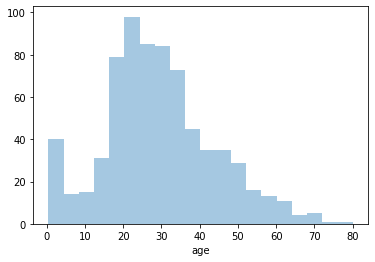

In [5]:
sns.distplot(titanic.age, kde=False)

### distribuicao `age` separando por `class ` ([comparar boxplot](#box_age_class))
<a id='hist_age_class'></a>

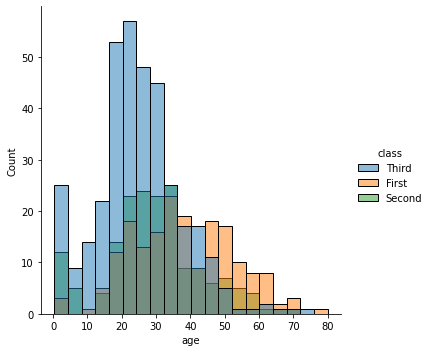

In [7]:
sns.displot(titanic, x="age", hue="class")

### distribuicao de `fare`
- zscore (scipy.stats)
- distplot (seaborn)

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


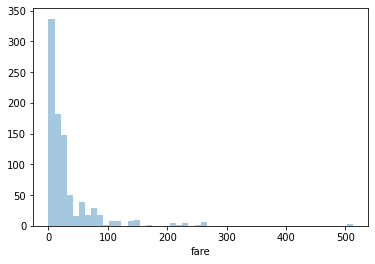

In [8]:
sns.distplot(titanic.fare, kde=False)

In [11]:
titanic["fare_zscore"] = stats.zscore(titanic["fare"])
titanic_filter = titanic.query("fare_zscore > -3 and fare_zscore < 3")

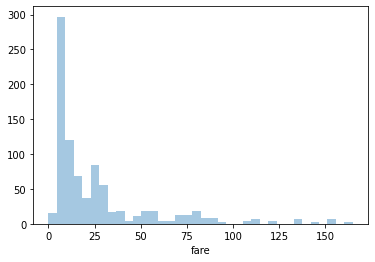

In [12]:
sns.distplot(titanic_filter.fare, kde=False)

------

## distribution pdf (probability density function)

![Distribution pdf](Exercises/Images/distribution_pdf.png)

### distribuicao de `age`

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


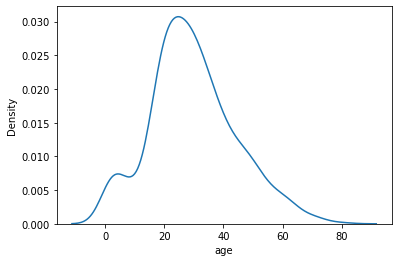

In [13]:
sns.distplot(titanic.age, hist=False)

### distribuicao de `fare` separando por `class` _([comparar boxplot](#box_fare_class))_
<a id='pdf_fare_class'></a>

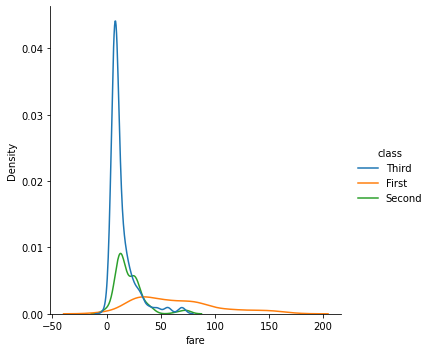

In [14]:
sns.displot(titanic_filter, x="fare", hue="class", kind="kde")

### PERGUNTA: quem pagou mais teve maiores chances de wobreviver?

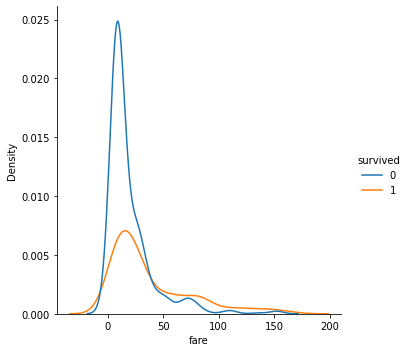

In [15]:
sns.displot(titanic_filter, x="fare", hue="survived", kind="kde")

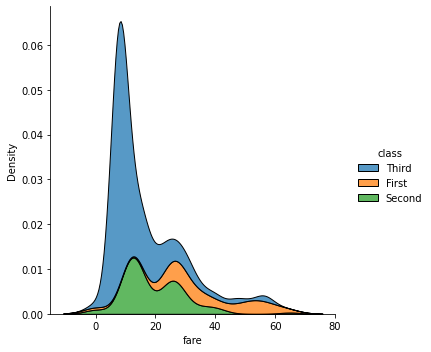

In [39]:
sns.displot(titanic_filter, x="fare", hue="class", kind="kde", multiple="stack") 

-----

## boxplot

![Boxplot](Exercises/Images/boxplot.png)

### distribuicao `age` separando por `class ` _([comparar histograma](#hist_age_class))_
<a id='box_age_class'></a>

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


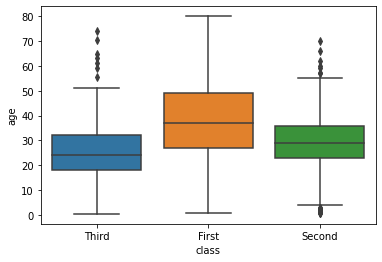

In [16]:
sns.boxplot(titanic["class"], titanic.age)

### distribuicao `fare` separando por `class` _([comparar distplot](#pdf_fare_class))_ 
- zscore (scipy.stats)
- boxplot (seaborn)

<a id='box_fare_class'></a>

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


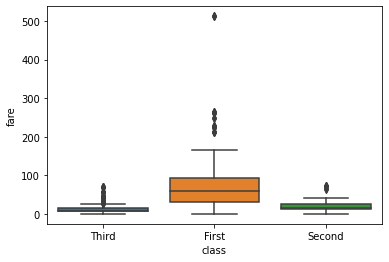

In [17]:
sns.boxplot(titanic["class"], titanic.fare)

In [18]:
from scipy import stats
import numpy as np

fare_iqr = stats.iqr(titanic.fare)
fare_q1 = np.percentile(titanic.fare, 25)
fare_q3 = np.percentile(titanic.fare, 75)

vmin = fare_q1 - 1.5*fare_iqr
vmax = fare_q3 + 1.5*fare_iqr

titanic_filter = titanic.query(f"fare > {vmin} and fare < {vmax}")

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


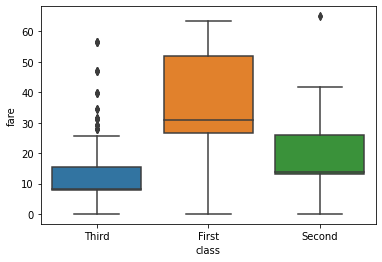

In [19]:
sns.boxplot(titanic_filter["class"], titanic_filter.fare)

------

## scatterplot

![Scatterplot](Exercises/Images/scatterplot.png)

### comparacao de porencia `horsepower` com consumo por milhas `mpg`

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


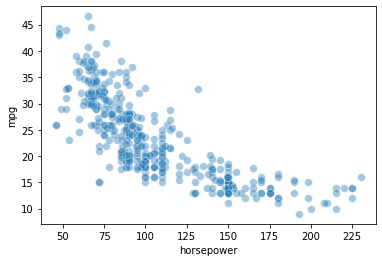

In [20]:
sns.scatterplot(mtcars.horsepower, mtcars.mpg, alpha=.4, s=60)

### adicionar `origin` no scatterplot

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


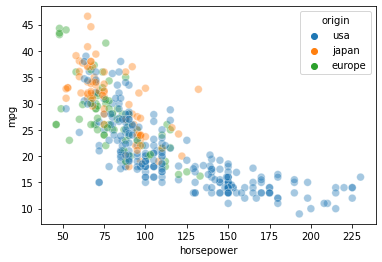

In [21]:
sns.scatterplot(mtcars.horsepower, mtcars.mpg, alpha=.4, s=60, hue=mtcars.origin)

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


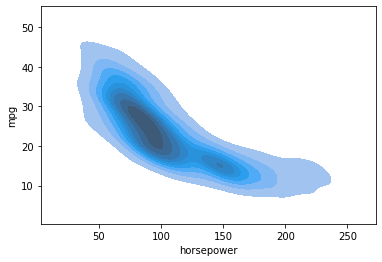

In [38]:
sns.kdeplot(mtcars.horsepower, mtcars.mpg, fill=True)

-----

## barplot

![Barplot](Exercises/Images/barplot.png)


### contagem de cada sexo
- countplot (seaborn)

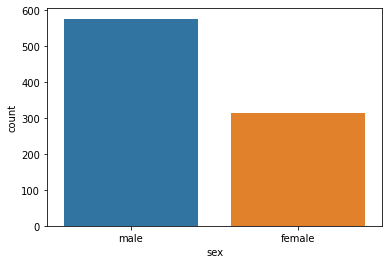

In [22]:
sns.countplot(data = titanic, x = "sex")

### media de `age` para cada `sex`
- groupby (pandas)
- barplot (seaborn)

In [23]:
idades = titanic.groupby("sex").agg({"age":"mean"}).reset_index()
idades

sex        age
0  female  27.915709
1    male  30.726645

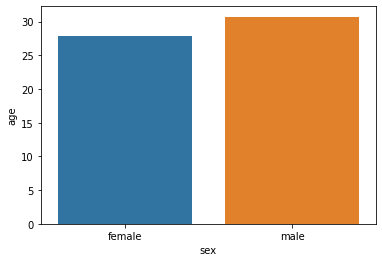

In [24]:
sns.barplot(data = idades, x = "sex", y = "age")

#### PERGUNTA: quem foi o grupo que mais morreu no titanic? `%`


In [25]:
titanic["1"] = 1

In [26]:
survived = titanic.groupby("sex").agg({"survived":"sum", "1":"sum"}).reset_index()

In [27]:
survived["procentage"] = survived.survived / survived["1"]

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


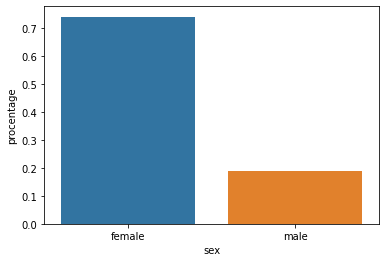

In [28]:
sns.barplot(survived.sex, survived.procentage)

-----

## lineplot

![Lineplot](Exercises/Images/lineplot.png)

### evolucao dos carros por cada ano (decada) - usando `model_year` e `horsepower`

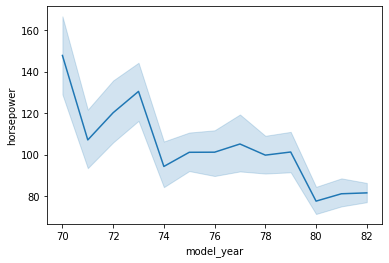

In [29]:
sns.lineplot(data = mtcars, x="model_year", y="horsepower")

### relacao entre `acceleration` e `mpg`
- numpy (round)
- groupby (pandas)
- lineplot (seaborn)

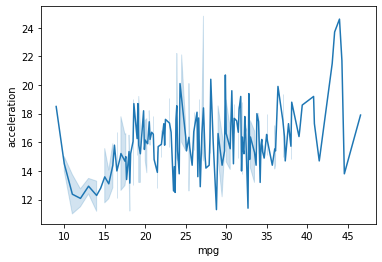

In [30]:
sns.lineplot(data=mtcars,x="mpg",y="acceleration")

In [31]:
mtcars["mpg_round"] = round(mtcars.mpg/10)*10

In [32]:
weight = mtcars.groupby("mpg_round").agg({"acceleration":"mean"}).reset_index()

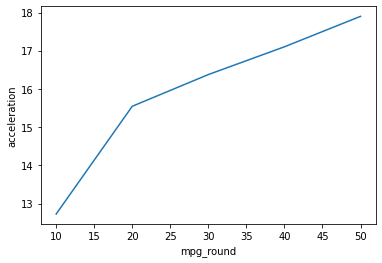

In [33]:
sns.lineplot(data=weight,x="mpg_round",y="acceleration")

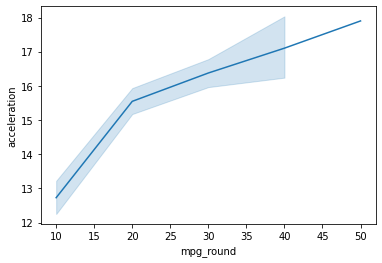

In [34]:
sns.lineplot(data=mtcars,x="mpg_round",y="acceleration")

#### PERGUNTA: porque quanto maior `mpg` menor `acceleration`?

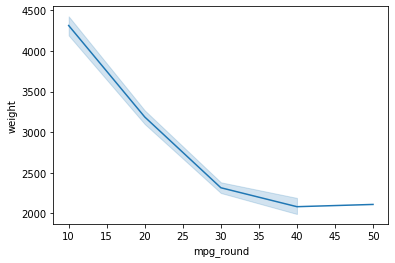

In [35]:
sns.lineplot(data=mtcars,x="mpg_round",y="weight")

-----

## outros

![Violinplot](Exercises/Images/violinplot.png)

![Pointplot](Exercises/Images/pointplot.png)